# Project 2 - Gender Classification

In [1]:
# ITCS 3162 Project 2 - Gender Classification
# Gray Lumsden 10/01/2023

# Explore & Clean Dataset

In [2]:
# Imports
%matplotlib inline

import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn import preprocessing
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

# Make the graphs a bit prettier, and bigger
plt.style.use('ggplot')
plt.rcParams['figure.figsize'] = (15, 5)

In [3]:
# Read & Display Dataset
gen_df = pd.read_csv('genderData.csv')
gen_df

,Favorite Color,Favorite Music Genre,Favorite Beverage,Favorite Soft Drink,Gender
0,Cool,Rock,Vodka,7UP/Sprite,F
1,Neutral,Hip hop,Vodka,Coca Cola/Pepsi,F
2,Warm,Rock,Wine,Coca Cola/Pepsi,F
3,Warm,Folk/Traditional,Whiskey,Fanta,F
4,Cool,Rock,Vodka,Coca Cola/Pepsi,F
...,...,...,...,...,...
61,Cool,Rock,Vodka,Coca Cola/Pepsi,M
62,Cool,Hip hop,Beer,Coca Cola/Pepsi,M
63,Neutral,Hip hop,Doesn't drink,Fanta,M
64,Cool,Rock,Wine,Coca Cola/Pepsi,M


In [4]:
# Dataset Info
gen_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 66 entries, 0 to 65
Data columns (total 5 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   Favorite Color        66 non-null     object
 1   Favorite Music Genre  66 non-null     object
 2   Favorite Beverage     66 non-null     object
 3   Favorite Soft Drink   66 non-null     object
 4   Gender                66 non-null     object
dtypes: object(5)
memory usage: 2.7+ KB


In [5]:
# See if dataset contains any duplicate or null values
null = gen_df.isnull().sum()
print(null)
duplicate = gen_df.duplicated().any()
print(duplicate)

Favorite Color          0
Favorite Music Genre    0
Favorite Beverage       0
Favorite Soft Drink     0
Gender                  0
dtype: int64
True


In [6]:
# Search for most popular values for each variable
most_color = gen_df['Favorite Color'].value_counts().idxmax()
print("Most Popular Color: ", most_color)
most_genre = gen_df['Favorite Music Genre'].value_counts().idxmax()
print("Most Popular Genre: ", most_genre)
most_bev = gen_df['Favorite Beverage'].value_counts().idxmax()
print("Most Popular Beverage: ", most_bev)
most_drink = gen_df['Favorite Soft Drink'].value_counts().idxmax()
print("Most Popular Soft Drink: ", most_drink)
most_gen = gen_df['Gender'].value_counts().idxmax()
print("Most Frequent Gender: ", most_gen)

Most Popular Color:  Cool
Most Popular Genre:  Rock
Most Popular Beverage:  Doesn't drink
Most Popular Soft Drink:  Coca Cola/Pepsi
Most Frequent Gender:  F


# Create Visualizations

In [7]:
# Separate data by Gender
gen_male = gen_df[gen_df['Gender'] == 'M']
gen_female = gen_df[gen_df['Gender'] == 'F']

Histogram for favorite colors by gender:

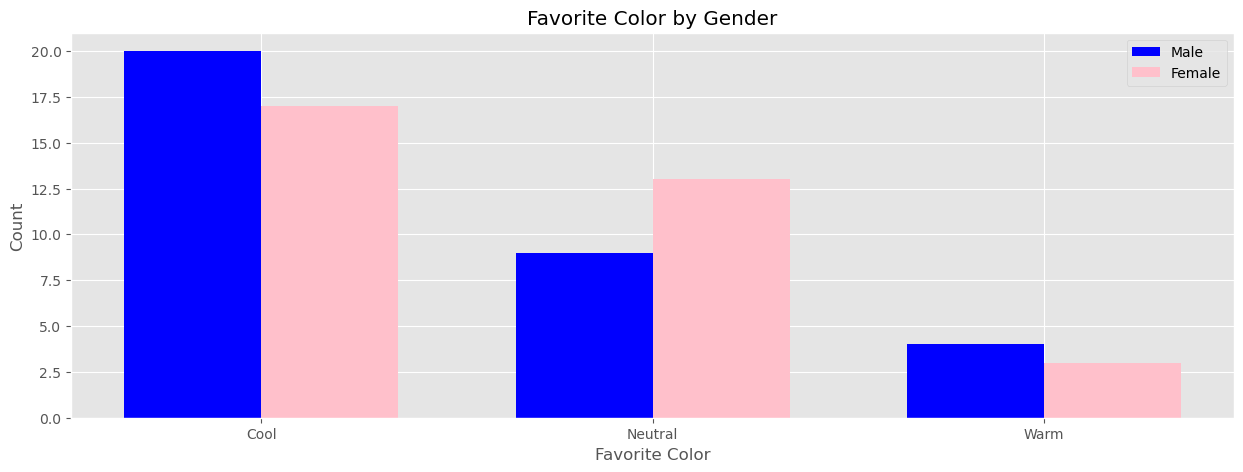

In [8]:
c_male = gen_male['Favorite Color'].value_counts()
c_female = gen_female['Favorite Color'].value_counts()

c_unique = gen_df['Favorite Color'].unique()

# Create a bar plot with different colors for male and female
bar_width = 0.35
index = np.arange(len(c_unique))

plt.bar(index - (bar_width/2), c_male, bar_width, label='Male', color='blue')
plt.bar(index + (bar_width/2), c_female, bar_width, label='Female', color='pink')

plt.xlabel('Favorite Color')
plt.ylabel('Count')
plt.xticks(index, c_unique)
plt.legend()
plt.title('Favorite Color by Gender')

plt.show()

Histogram for favorite music genres by gender:

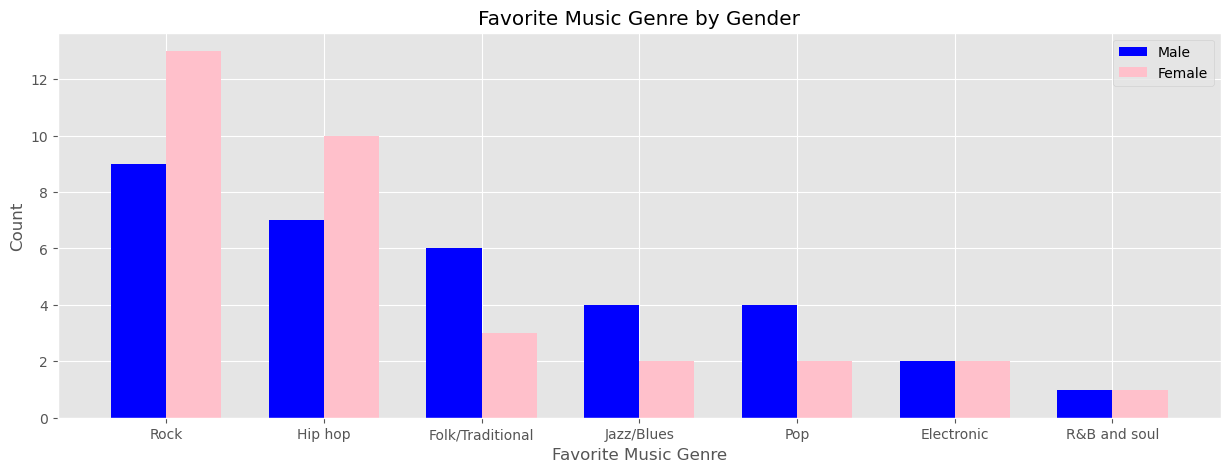

In [9]:
m_male = gen_male['Favorite Music Genre'].value_counts()
m_female = gen_female['Favorite Music Genre'].value_counts()

m_unique = gen_df['Favorite Music Genre'].unique()

# Create a bar plot with different colors for male and female
bar_width = 0.35
index = np.arange(len(m_unique))

plt.bar(index - (bar_width/2), m_male, bar_width, label='Male', color='blue')
plt.bar(index + (bar_width/2), m_female, bar_width, label='Female', color='pink')

plt.xlabel('Favorite Music Genre')
plt.ylabel('Count')
plt.xticks(index, m_unique)
plt.legend()
plt.title('Favorite Music Genre by Gender')

plt.show()

Histogram for favorite alcoholic drinks by gender:

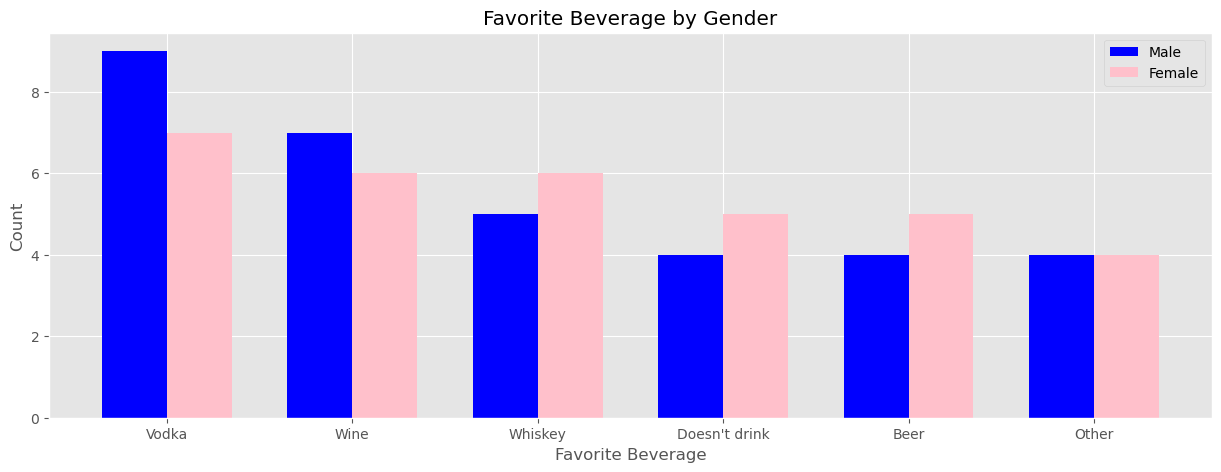

In [10]:
b_male = gen_male['Favorite Beverage'].value_counts()
b_female = gen_female['Favorite Beverage'].value_counts()

b_unique = gen_df['Favorite Beverage'].unique()

# Create a bar plot with different colors for male and female
bar_width = 0.35
index = np.arange(len(b_unique))

plt.bar(index - (bar_width/2), b_male, bar_width, label='Male', color='blue')
plt.bar(index + (bar_width/2), b_female, bar_width, label='Female', color='pink')

plt.xlabel('Favorite Beverage')
plt.ylabel('Count')
plt.xticks(index, b_unique)
plt.legend()
plt.title('Favorite Beverage by Gender')

plt.show()

Histogram for favorite sodas by gender:

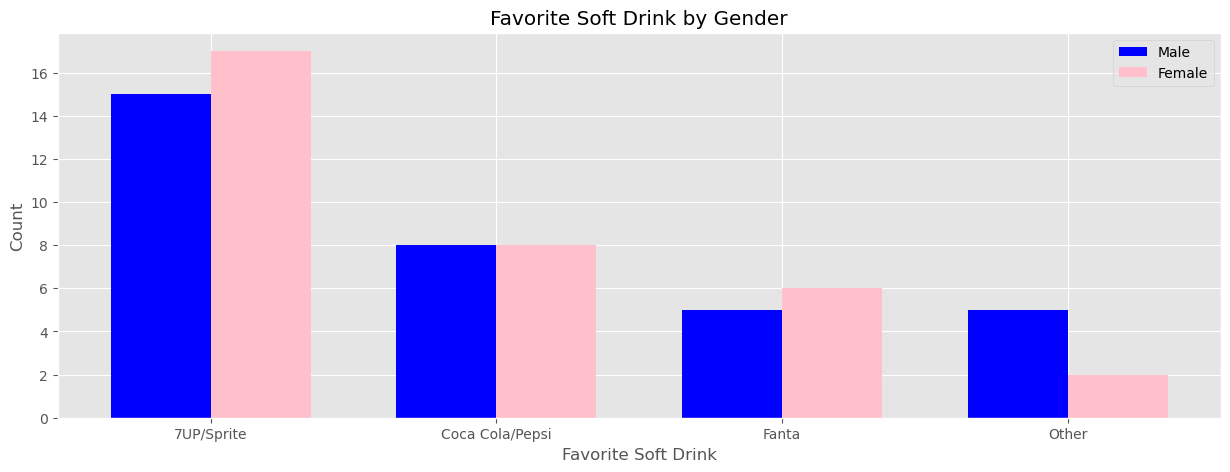

In [11]:
s_male = gen_male['Favorite Soft Drink'].value_counts()
s_female = gen_female['Favorite Soft Drink'].value_counts()

s_unique = gen_df['Favorite Soft Drink'].unique()

# Create a bar plot with different colors for male and female
bar_width = 0.35
index = np.arange(len(s_unique))

plt.bar(index - (bar_width/2), s_male, bar_width, label='Male', color='blue')
plt.bar(index + (bar_width/2), s_female, bar_width, label='Female', color='pink')

plt.xlabel('Favorite Soft Drink')
plt.ylabel('Count')
plt.xticks(index, s_unique)
plt.legend()
plt.title('Favorite Soft Drink by Gender')

plt.show()

# Modeling & Evaluation

Decision Tree Model (CART):

In [12]:
# Create dummy variables
gen_df = pd.get_dummies(gen_df, columns=['Favorite Color','Favorite Music Genre',
                               'Favorite Beverage', 'Favorite Soft Drink' ], prefix = ['dummy','dummy','dummy','dummy'])
gen_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 66 entries, 0 to 65
Data columns (total 21 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   Gender                  66 non-null     object
 1   dummy_Cool              66 non-null     uint8 
 2   dummy_Neutral           66 non-null     uint8 
 3   dummy_Warm              66 non-null     uint8 
 4   dummy_Electronic        66 non-null     uint8 
 5   dummy_Folk/Traditional  66 non-null     uint8 
 6   dummy_Hip hop           66 non-null     uint8 
 7   dummy_Jazz/Blues        66 non-null     uint8 
 8   dummy_Pop               66 non-null     uint8 
 9   dummy_R&B and soul      66 non-null     uint8 
 10  dummy_Rock              66 non-null     uint8 
 11  dummy_Beer              66 non-null     uint8 
 12  dummy_Doesn't drink     66 non-null     uint8 
 13  dummy_Other             66 non-null     uint8 
 14  dummy_Vodka             66 non-null     uint8 
 15  dummy_Wh

In [13]:
# Set predictor and target variables
X = gen_df.drop('Gender', axis=1)
y = gen_df[['Gender']]

In [14]:
# Create training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size =0.25, random_state = 1)
print(X_test.shape)
print(X_train.shape)

(17, 20)
(49, 20)


In [19]:
# Baseline Accuracy
y_train['Gender'].value_counts(normalize=True)

F    0.591837
M    0.408163
Name: Gender, dtype: float64

With the target variable being Gender, the baseline accuracy is about 59%.

In [15]:
# Import DTC, accuracy and classification functions
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report

In [ ]:
# Create CART decision tree using DecisionTreeClassifier()
cart01 = DecisionTreeClassifier(max_leaf_nodes=5).fit(X_train,y_train)

In [ ]:
# Apply model to predict target feature
prediction_cart01 = cart01.predict(X_test)

In [ ]:
# Evaluate accuracy using testing data
accuracy = accuracy_score(y_test, prediction_cart01)
print(f'Accuracy: {accuracy:.2f}')

In [ ]:
# Obtain classification report for decision tree
report = classification_report(y_test, prediction_cart01)
print("Classification Report:\n", report)

Random Forest Model:

In [ ]:
from sklearn.ensemble import RandomForestClassifier

In [ ]:
# Create Random Forest using RandomForestClassifier()
r_forest = RandomForestClassifier(n_estimators=10, random_state=1).fit(X_train,y_train)

In [ ]:
# Apply model to predict target feature
prediction_rf = r_forest.predict(X_test)

In [ ]:
# Evaluate accuracy using testing data
accuracy2 = accuracy_score(y_test, prediction_rf)
print(f'Accuracy: {accuracy:.2f}')

In [ ]:
# Obtain classification report for Random Forest
report2 = classification_report(y_test, prediction_rf)
print("Classification Report:\n", report2)

Support Vector Model:

In [ ]:
from sklearn.svm import SVC

In [ ]:
# Create SVM using SVC()
svm = SVC(kernel='linear', random_state=1).fit(X_train,y_train)

In [ ]:
# Apply model to predict target feature
prediction_svm = svm.predict(X_test)

In [ ]:
# Evaluate accuracy using testing data
accuracy3 = accuracy_score(y_test, prediction_svm)
print(f'Accuracy: {accuracy:.2f}')

In [ ]:
# Obtain classification report for Support Vector Model
report3 = classification_report(y_test, prediction_svm)
print("Classification Report:\n", report3)

K-Nearest Neighbors Model:

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler

In [ ]:
# Scale training and testing sets
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [ ]:
# Create KNN using KNeighborsClassifier()
k = 10
knn = KNeighborsClassifier(n_neighbors=k).fit(X_train,y_train)

In [ ]:
# Apply model to predict target feature
prediction_knn = knn.predict(X_test)

In [ ]:
# Evaluate accuracy using testing data
accuracy4 = accuracy_score(y_test, prediction_knn)
print(f'Accuracy: {accuracy:.2f}')

In [ ]:
# Obtain classification report for K-Nearest Neighbors
report4 = classification_report(y_test, prediction_knn)
print("Classification Report:\n", report4)